# Exploratory Data Analysis
----



### Lighthouse Labs, Midterm Project Project - Predicting Flight Delays.

##### January 13, 2023. Terre Leung, Tetiana Fesenko, and Jamie Dormaar

---

_Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA._


_We shouldn't limit our EDA to these 10 questions. Let's be creative :)._

In [149]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import os
import json
import requests



In [150]:
# Load data tables:
flights_initial_500000_records    = pd.read_csv('../data/flights_initial_500000_records.csv', delimiter= ',')
flights_delay_dates_all_records   = pd.read_csv('../data/flights_delay_dates_all_records.csv', delimiter= ',')
flights_random_100000_records     = pd.read_csv('../data/flights_random_100000_records.csv', delimiter= ',')
flights_test_all_records          = pd.read_csv('../data/flights_test_all_records.csv', delimiter= ',')
fuel_consumption_all_records      = pd.read_csv('../data/fuel_consumption_all_records.csv', delimiter= ',')
passengers_initial_300000_records = pd.read_csv('../data/passengers_initial_300000_records.csv', delimiter= ',')
flights_usa                       = pd.read_csv('../data/usa_flights2.csv')
df_numeric                        = pd.read_csv('../data/df_numeric.csv', delimiter=',')

In [151]:
# Save working copies of the data:
df_fl_init    = flights_initial_500000_records.copy()
df_fl_delays  = flights_delay_dates_all_records.copy()
df_fl_smpl1   = flights_random_100000_records.copy()
df_fl_test    = flights_test_all_records.copy()
df_fc         = fuel_consumption_all_records.copy()
df_pa_init    = passengers_initial_300000_records.copy()
df_fl_US      = flights_usa.copy()

##### Set your session working table to temp variable df:

In [252]:
df = flights_usa.copy()
# df = df_fl_init.copy()



##### SAVE a session timestamp to label the saved outputs: 
>(Optional: this can be useful if you want to help keep your files organized)


In [253]:

tag = 'df_usa_' # option with leading name            'Jamie_'
# tag = ''
# dt = dt.now().time().strftime(f'%b%d_%H%M')   # 'Jan01_1704'
# dt = dt.now().time().strftime(f'%b%-d_%H%M')  # 'Jan1_1708'
# dt = dt.now().time().strftime(f'%a_%H%M')        # 'Mon_1710'
dt = ''
session = f'{tag}{dt}'

##### SETUP: A first look at tables:


In [254]:
# flights_initial_500000_records
print(f'\nflights_initial_500000_records.shape: {flights_initial_500000_records.shape}')
print(f'NOTE: This table is too large, and included only two months of 2018')
# display(flights_initial_500000_records.head())

# flights_delay_dates_all_records
print(f'\nflights_delay_dates_all_records.shape: {flights_delay_dates_all_records.shape}')
print(f'NOTE: This table just informed us that the entirety of the flights source table is for the complete date range of 2018-2019')
# display(flights_delay_dates_all_records.head())

# flights_random_100000_records
print(f'\nflights_random_100000_records.shape: {flights_random_100000_records.shape}')
print(f'NOTE: Our primary use table, missing monthly data from June and Nov')
display(flights_random_100000_records.head())

# flights_test_all_records
print(f'\nflights_test_all_records.shape: {flights_test_all_records.shape}')
print(f'NOTE: Our ML test table')
display(flights_test_all_records.head())

# fuel_consumption_all_records
print(f'\nfuel_consumption_all_records.shape: {fuel_consumption_all_records.shape}')
print(f'NOTE: Our fuel_consumption table, complete')
display(fuel_consumption_all_records.head())

# passengers_initial_300000_records
print(f'\npassengers_initial_300000_records.shape: {passengers_initial_300000_records.shape}')
print(f'NOTE: A non-random sample from source passengers table.')
display(passengers_initial_300000_records.head())



flights_initial_500000_records.shape: (500000, 41)
NOTE: This table is too large, and included only two months of 2018

flights_delay_dates_all_records.shape: (15927485, 2)
NOTE: This table just informed us that the entirety of the flights source table is for the complete date range of 2018-2019

flights_random_100000_records.shape: (100000, 42)
NOTE: Our primary use table, missing monthly data from June and Nov


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-10-05,WN,WN,WN,179,WN,N8312C,179,12953,LGA,...,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-05,WN,WN,WN,1106,WN,N219WN,1106,12953,LGA,...,725,10.0,0.0,3.0,0.0,28.0,NaN,NaN,NaN,NaN
2,2018-10-05,WN,WN,WN,1579,WN,N8535S,1579,13232,MDW,...,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-05,WN,WN,WN,2136,WN,N436WN,2136,13342,MKE,...,1756,8.0,0.0,0.0,0.0,294.0,NaN,NaN,NaN,NaN
4,2018-10-05,WN,WN,WN,2423,WN,N221WN,2423,14057,PDX,...,543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



flights_test_all_records.shape: (660556, 20)
NOTE: Our ML test table


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01 00:00:00,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01 00:00:00,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01 00:00:00,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01 00:00:00,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01 00:00:00,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333



fuel_consumption_all_records.shape: (3035, 25)
NOTE: Our fuel_consumption table, complete


,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016



passengers_initial_300000_records.shape: (300000, 37)
NOTE: A non-random sample from source passengers table.


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,month,year,distance_group,class
0,3,3,3600,18,0,210,41,81,166,160,...,"Olga Bay, AK",US,United States,0,40,4,10,2019,1,F
1,3,3,3000,15,3,24,0,39,67,61,...,"Old Harbor, AK",US,United States,0,79,3,10,2019,1,F
2,3,3,3600,18,1,0,0,93,167,161,...,"Kodiak Island, AK",US,United States,0,40,4,10,2019,1,F
3,3,3,3600,18,4,175,86,14,38,32,...,"Seal Bay, AK",US,United States,0,40,4,10,2019,1,F
4,3,3,3600,18,0,209,41,10,32,26,...,"Lazy Bay, AK",US,United States,0,40,4,10,2019,1,F


##### NOTE: Missing Data content for each of the four data tables.


In [255]:
# Check for nulls:
# flights Table percent Null content:
df_fl_smpl1_nulls = df_fl_smpl1.isnull().sum().sort_values(ascending= False)
percent = (df_fl_smpl1.isnull().sum()/df_fl_smpl1.isnull().count()).sort_values(ascending = False)
df_fl_smpl1_missing_data = pd.concat(
    [df_fl_smpl1_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nflights_missing_data.head(20)')
display(df_fl_smpl1_missing_data.head(20))

# flights_test Table percent Null content:
df_fl_test_nulls = df_fl_test.isnull().sum().sort_values(ascending= False)
percent = (df_fl_test.isnull().sum()/df_fl_test.isnull().count()).sort_values(ascending = False)
df_fl_test_missing_data = pd.concat(
    [df_fl_test_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nflights_test_missing_data.head(20)')
display(df_fl_test_missing_data.head(20))

# fuel_consumption Table percent Null content:
df_fc_nulls = df_fc.isnull().sum().sort_values(ascending= False)
percent = (df_fc.isnull().sum()/df_fc.isnull().count()).sort_values(ascending = False)
df_fc_missing_data = pd.concat(
    [df_fc_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nfuel_consumption_missing_data.head(20)')
display(df_fc_missing_data.head(20))

# passengers Table percent Null content:
df_pa_init_nulls = df_pa_init.isnull().sum().sort_values(ascending= False)
percent = (df_pa_init.isnull().sum()/df_pa_init.isnull().count()).sort_values(ascending = False)
df_pa_init_missing_data = pd.concat(
    [df_pa_init_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\npassengers_missing_data.head(20)')
display(df_pa_init_missing_data.head(20))



flights_missing_data.head(20)


,Total,Percent
no_name,100000,1.00000
first_dep_time,99323,0.99323
longest_add_gtime,99323,0.99323
total_add_gtime,99323,0.99323
cancellation_code,98323,0.98323
late_aircraft_delay,81401,0.81401
carrier_delay,81401,0.81401
security_delay,81401,0.81401
nas_delay,81401,0.81401
weather_delay,81401,0.81401



flights_test_missing_data.head(20)


,Total,Percent
tail_num,1499,0.002269
fl_date,0,0.000000
dest_airport_id,0,0.000000
flights,0,0.000000
crs_elapsed_time,0,0.000000
dup,0,0.000000
crs_arr_time,0,0.000000
crs_dep_time,0,0.000000
dest_city_name,0,0.000000
dest,0,0.000000



fuel_consumption_missing_data.head(20)


,Total,Percent
total_gallons,6,0.001977
tdomt_gallons,3,0.000988
slat_gallons,2,0.000659
slat_cost,1,0.000329
spac_cost,1,0.000329
satl_cost,1,0.000329
tint_gallons,1,0.000329
airline_id,1,0.000329
ts_gallons,1,0.000329
sint_gallons,1,0.000329



passengers_missing_data.head(20)


,Total,Percent
departures_scheduled,0,0.0
origin_city_market_id,0,0.0
origin_city_name,0,0.0
origin_country,0,0.0
origin_country_name,0,0.0
dest_airport_id,0,0.0
dest_city_market_id,0,0.0
dest,0,0.0
dest_city_name,0,0.0
dest_country,0,0.0


##### NOTE: Differences between flights, and flights_test table data:

In [256]:
flights_columns = df_fl_init.columns
flights_columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime'],
      dtype='object')

In [257]:
flights_test_columns = df_fl_test.columns
flights_test_columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance'],
      dtype='object')

In [258]:
fl_test_exclusion = df_fl_init[df_fl_init.columns[~df_fl_init.columns.isin(flights_test_columns)]]
fl_test_exclusion.head()

,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,arr_time,arr_delay,cancelled,cancellation_code,...,actual_elapsed_time,air_time,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2219.0,-1.0,14.0,2233.0,2345.0,12.0,2357.0,-2.0,0,NaN,...,158.0,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1442.0,-1.0,17.0,1459.0,1546.0,10.0,1556.0,-9.0,0,NaN,...,74.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,619.0,-6.0,16.0,635.0,858.0,17.0,915.0,-13.0,0,NaN,...,116.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1024.0,-6.0,23.0,1047.0,1314.0,10.0,1324.0,-24.0,0,NaN,...,240.0,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,923.0,-2.0,21.0,944.0,1115.0,8.0,1123.0,17.0,0,NaN,...,180.0,151.0,0.0,0.0,17.0,0.0,0.0,NaN,NaN,NaN


## SESSION DATA TABLE EDA:

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567622 entries, 0 to 1567621
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   fl_date              1567622 non-null  datetime64[ns]
 1   origin_city_name     1567622 non-null  object        
 2   dest_city_name       1567622 non-null  object        
 3   dep_time             1567622 non-null  int64         
 4   dep_delay            1567153 non-null  float64       
 5   arr_time             1567054 non-null  float64       
 6   arr_delay            1563543 non-null  float64       
 7   air_time             1563150 non-null  float64       
 8   crs_elapsed_time     1567622 non-null  int64         
 9   actual_elapsed_time  1563757 non-null  float64       
 10  distance             1567622 non-null  int64         
 11  year                 1567622 non-null  int64         
 12  month                1567622 non-null  int64         
 1

##### ANALYZE: Arrival delay details in the flights table:


#### **Task 1**: 

1. Test the hypothesis that the delay is from Normal distribution. 
1. And, that the **mean** of the arrival delays is 0. 
1. Be careful about the outliers.

>##### TASK 1.1: Test the hypothesis that the delay is from Normal distribution. 

In [260]:
df[['arr_delay']].value_counts().sort_values(ascending=False).head(20)

arr_delay
-11.0        46535
-10.0        46417
-9.0         46032
-12.0        45770
-8.0         45273
-13.0        44946
-14.0        43549
-7.0         43526
-6.0         41771
-15.0        41504
-5.0         40350
-16.0        39341
-4.0         37844
-17.0        36606
-3.0         35805
-18.0        34064
-2.0         33745
-1.0         31565
-19.0        30614
 0.0         29851
dtype: int64

In [261]:
df['arr_delay'].describe()

count    1.563543e+06
mean     5.478516e+00
std      4.982834e+01
min     -4.750000e+02
25%     -1.500000e+01
50%     -6.000000e+00
75%      8.000000e+00
max      1.861000e+03
Name: arr_delay, dtype: float64

The `stats` package from the `scipy` module will test the Null hypothesis that the data is normally distributed.
If the resulting p value is > than 0.05 we can assume the data is distributed normally with high statistical probability.

In [262]:
# from scipy import stats
stat, p = stats.shapiro(df['arr_delay'])
print('%0.15f' % p, stat)

1.000000000000000 nan


The statistical calculation above printed the following warning:
```
UserWarning: p-value may not be accurate for N > 5000.
```
Smaller samples taken to correct for this inaccuracy:

In [263]:
# Sample a subset:
x = df.sample(1000)
len(x)

1000

In [264]:
# Rerun Shapiro Wilk Normality Test:
stat, p = stats.shapiro(x['arr_delay'])
print('%0.15f' % p, stat)

1.000000000000000 nan


The data appears to indeed be normally distributed.

>##### TASK 1.3: Managing outliers.

##### VISUALIZE: Arrival delay distribution, and manage outliers:

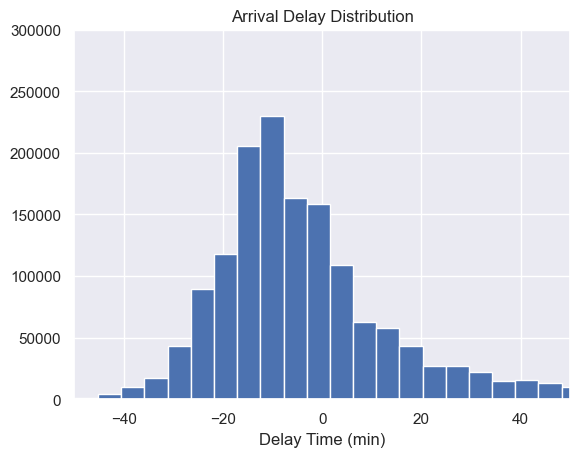

In [265]:
plt.hist(df['arr_delay'], bins=500)


plt.xlabel('Delay Time (min)')
plt.title('Arrival Delay Distribution')
plt.xlim(-50, 50)
plt.ylim(0, 300000)

plt.savefig(f'../Images/Arrival_delay_distn_{session}.png')
plt.show()


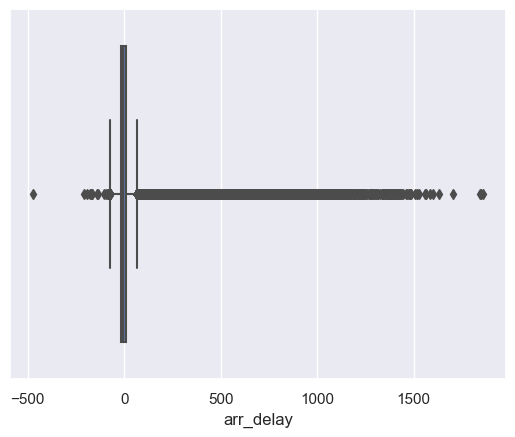

In [266]:
# Outlier detection:
sns.boxplot(data= df, x='arr_delay', whis= 2.5)

plt.savefig(f'../Images/Arrival_delay_outliers_boxplot_{session}.png')

Manually chosen outlier range limits:

In [267]:
# # Define and remove the outliers by a chosen parameter:
# max_delay = 100
# outliers    = df_fl_init[df_fl_init['arr_delay'] > max_delay]
# df_fl_clean = df_fl_init[df_fl_init['arr_delay'] < max_delay]

or using the standard 1.5 * IQR:

In [268]:
# Instantiate the Arrival Delays:
delays = df['arr_delay']

# Define the quantiles of the delay distribution:
Q1 = delays.quantile(0.25)
Q3 = delays.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
min_threshold = (Q1 - 1.5 * IQR)
max_threshold = (Q3 + 1.5 * IQR)

In [269]:
df_clean = df[~((delays < min_threshold)|(delays > max_threshold))]
df_clean.shape

(1421955, 18)

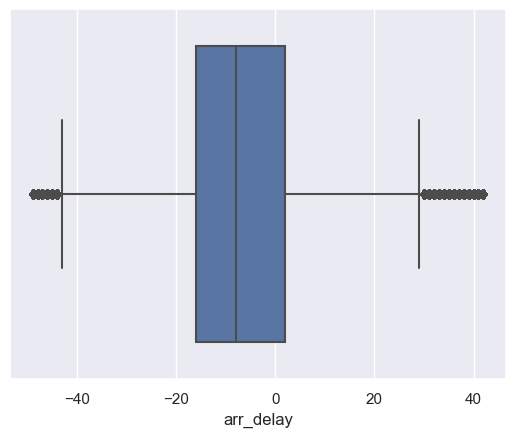

In [270]:
sns.boxplot(x=df_clean['arr_delay'])

#SAVE boxplot of clean delay distribution:
plt.savefig(f'../Images/Arrival_delay_boxplot_{session}.png')

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [271]:
# Convert fl_date from string to datetime data type
df_clean[['fl_date']] = df_clean[['fl_date']].apply(pd.to_datetime)

In [272]:
df_clean['date'] = df_clean['fl_date'].dt.date
df_clean['year'] = df_clean['fl_date'].dt.year
df_clean['month'] = df_clean['fl_date'].dt.month


In [273]:
print(df_clean[['year', 'month', 'fl_date', 'date']].dtypes)
display(df_clean[['year', 'month', 'fl_date', 'date']].head())

year                int64
month               int64
fl_date    datetime64[ns]
date               object
dtype: object


,year,month,fl_date,date
0,2018,1,2018-01-22,2018-01-22
1,2018,1,2018-01-22,2018-01-22
2,2018,1,2018-01-22,2018-01-22
3,2018,1,2018-01-22,2018-01-22
4,2018,1,2018-01-22,2018-01-22


In [274]:
df_clean[['month', 'year', 'arr_delay']].groupby(['year', 'month']).describe()

arr_delay                                                  
               count      mean        std   min   25%   50%  75%   max
year month                                                            
2018 1       54825.0 -7.097839  15.920611 -49.0 -18.0  -9.0  1.0  42.0
     2       50697.0 -6.203681  16.042269 -49.0 -17.0  -8.0  2.0  42.0
     3       60156.0 -5.443846  15.189594 -49.0 -15.0  -7.0  3.0  42.0
     4       58651.0 -5.369593  14.991629 -49.0 -15.0  -8.0  2.0  42.0
     5       59495.0 -5.096647  15.027732 -49.0 -15.0  -7.0  2.0  42.0
     6       59233.0 -4.166883  15.334886 -49.0 -14.0  -7.0  4.0  42.0
     7       60804.0 -4.235938  15.391234 -49.0 -14.0  -7.0  4.0  42.0
     8       60194.0 -4.048742  15.348651 -49.0 -14.0  -7.0  4.0  42.0
     9       57659.0 -6.166479  14.492060 -49.0 -16.0  -8.0  1.0  42.0
     10      61665.0 -5.011692  14.590675 -49.0 -15.0  -7.0  2.0  42.0
     11      57463.0 -4.374867  15.348760 -49.0 -15.0  -7.0  4.0  42.0
     12      58941.0 -5.545647  16.030104 -49.0 -16.0  -8.0  3.0  42.0
2019 1       56177.0 -6.264058  15.980623 -49.0 -17.0  -8.0  2.0  42.0
     2       49876.0 -4.495970  16.599795 -49.0 -16.0  -7.0  5.0  42.0
     3       62260.0 -5.912448  15.013804 -49.0 -16.0  -8.0  2.0  42.0
     4       59356.0 -6.299178  15.110985 -49.0 -16.0  -9.0  1.0  42.0
     5       61212.0 -5.174345  15.149212 -49.0 -15.0  -8.0  2.0  42.0
     6       58846.0 -3.594552  15.516485 -49.0 -14.0  -6.0  4.0  42.0
     7       62201.0 -5.258485  15.227768 -49.0 -15.0  -8.0  2.0  42.0
     8       63035.0 -5.160498  15.087054 -49.0 -15.0  -8.0  2.0  42.0
     9       60459.0 -7.535106  14.397883 -49.0 -17.0 -10.0 -1.0  42.0
     10      63130.0 -6.039379  14.946033 -49.0 -16.0  -8.0  1.0  42.0
     11      60820.0 -7.228494  15.079796 -49.0 -17.0  -9.0  0.0  42.0
     12      60721.0 -5.323331  16.188259 -49.0 -16.0  -8.0  3.0  42.0

>NOTE: This was the point where we discovered that our initial sample of 500000 records we collected from the source flights table turned out to only include records from 2 months in 2018.  So evidently the source table is sorted by date.

In [275]:
df_clean.columns

Index(['fl_date', 'origin_city_name', 'dest_city_name', 'dep_time',
       'dep_delay', 'arr_time', 'arr_delay', 'air_time', 'crs_elapsed_time',
       'actual_elapsed_time', 'distance', 'year', 'month', 'state', 'late_arr',
       'late_dep', 'speed', 'dep_time_hour', 'date'],
      dtype='object')

In [276]:
# Separate the data for easier viewing re annual delay trends:
df_clean_2018 = df_clean[df_clean['year']==2018]
df_clean_2019 = df_clean[df_clean['year']==2019]

In [277]:
df_clean_2018.groupby(['month']).agg({'arr_delay': np.mean}).sort_values('arr_delay', ascending=False)
# df_delays_2018.groupby(['year', 'month']).agg(({'arr_delay': np.median}))

,arr_delay
month,
8,-4.048742
6,-4.166883
7,-4.235938
11,-4.374867
10,-5.011692
5,-5.096647
4,-5.369593
3,-5.443846
12,-5.545647


In [278]:
df_clean_2019.groupby('month').agg({'arr_delay': np.mean}).sort_values('arr_delay', ascending=False)
# df_delays_2019.groupby(['year', 'month']).agg(({'arr_delay': np.median}))

,arr_delay
month,
6,-3.594552
2,-4.495970
8,-5.160498
5,-5.174345
7,-5.258485
12,-5.323331
3,-5.912448
10,-6.039379
1,-6.264058


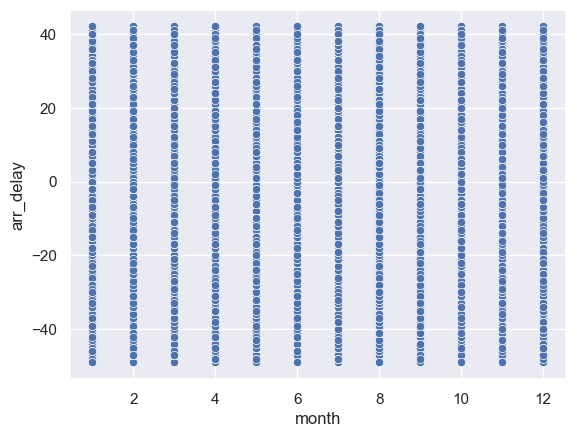

In [279]:
sns.scatterplot(data=df_clean, x="month", y="arr_delay")
plt.show()

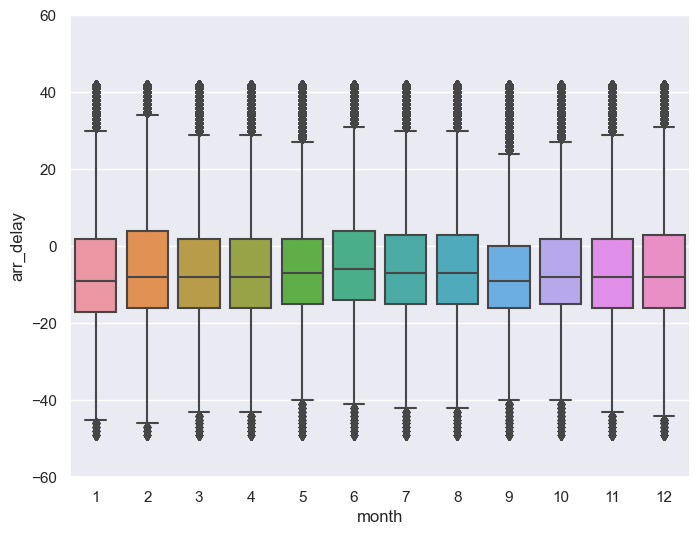

In [280]:
# month
var = 'month'
data = df_clean[['arr_delay',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="arr_delay", data=data)
fig.axis(ymin=-60, ymax=60)

plt.savefig(f'../Images/Arrival_delays_monthly_boxplot_{session}.png')

There doesn't appear to be an observable trend.

Perhaps if we isolate the flights with a single country as a destination, for example the US:

In [281]:
df_clean['origin_region_code'] = df_clean['origin_city_name'].str[-2:]
df_clean['dest_region_code'] = df_clean['dest_city_name'].str[-2:]

In [282]:
us_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO'
  , 'CT', 'DE', 'DC', 'FL', 'GA', 'HI'
  , 'ID', 'IL', 'IN', 'IA', 'KS', 'KY'
  , 'LA', 'ME', 'MD', 'MA', 'MI', 'MN'
  , 'MS', 'MO', 'MT', 'NE', 'NV', 'NH'
  , 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH'
  , 'OK', 'OR', 'PA', 'RI', 'SC', 'SD'
  , 'TN', 'TX', 'UT', 'VT', 'VA', 'WA'
  , 'WV', 'WI', 'WY'
  , 'PR', 'VI', 'TT'   #US Territories
]


In [283]:
df_us = df_clean[df_clean['dest_region_code'].isin(us_states)]
print(df_us.shape)
print(df_clean.shape)
df_us.head()

(1421955, 21)
(1421955, 21)


,fl_date,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,air_time,crs_elapsed_time,actual_elapsed_time,...,year,month,state,late_arr,late_dep,speed,dep_time_hour,date,origin_region_code,dest_region_code
0,2018-01-22,"Dallas/Fort Worth, TX","Orlando, FL",1845,-5.0,2229.0,1.0,117.0,158,164.0,...,2018,1,TX,1,0,8.418803,18,2018-01-22,TX,FL
1,2018-01-22,"Dallas/Fort Worth, TX","Baltimore, MD",1313,-2.0,1651.0,-16.0,137.0,172,158.0,...,2018,1,TX,0,0,8.883212,13,2018-01-22,TX,MD
2,2018-01-22,"Dallas/Fort Worth, TX","Miami, FL",526,-4.0,900.0,-11.0,135.0,161,154.0,...,2018,1,TX,0,0,8.303704,5,2018-01-22,TX,FL
3,2018-01-22,"Kansas City, MO","Chicago, IL",1553,-4.0,1801.0,28.0,98.0,96,128.0,...,2018,1,MO,1,0,4.112245,15,2018-01-22,MO,IL
4,2018-01-22,"Dallas/Fort Worth, TX","St. Louis, MO",1836,-4.0,2015.0,-10.0,76.0,105,99.0,...,2018,1,TX,0,0,7.236842,18,2018-01-22,TX,MO


In [284]:
not_us = df_clean[~df_clean['dest_region_code'].isin(us_states)]
print(not_us.shape)
print(df_clean.shape)
not_us.head()

(0, 21)
(1421955, 21)


,fl_date,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,air_time,crs_elapsed_time,actual_elapsed_time,...,year,month,state,late_arr,late_dep,speed,dep_time_hour,date,origin_region_code,dest_region_code


In [285]:
print(not_us.dest_city_name.value_counts())
print(not_us.dest_region_code.value_counts())

Series([], Name: dest_city_name, dtype: int64)
Series([], Name: dest_region_code, dtype: int64)


In [286]:
# df_us[~df_us]
print(len(us_states))
df_us['dest_region_code'].nunique()

54


53

(-0.5, 11.5, -60.0, 60.0)

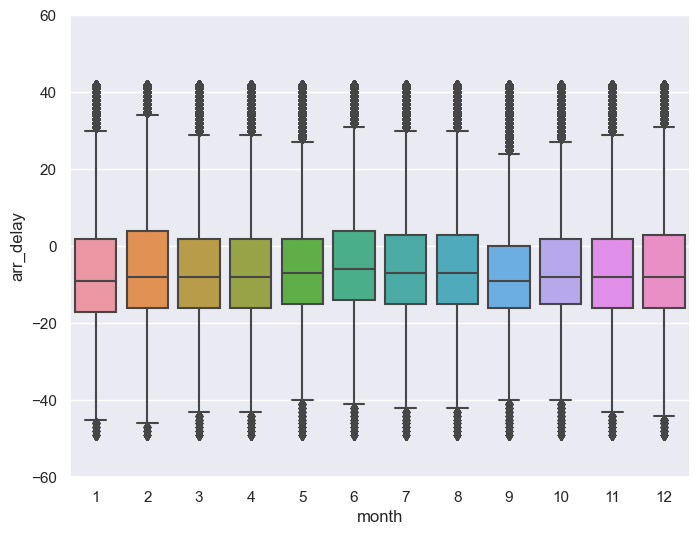

In [287]:
# US only
var = 'month'
data = df_us[['arr_delay',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="arr_delay", data=data)
fig.axis(ymin=-60, ymax=60)

In [288]:
# df_us[['month', 'arr_delay']].groupby('month').median().sort_values('arr_delay')

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:

[Local Historical Weather API, WWO](https://www.worldweatheronline.com/weather-api/api/docs/historical-weather-api.aspx)
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [289]:
# NOTE: would like to increase location precision later with lat/long coords of the dest_airport_id later
# For now will approximate with dest_city_name and 
dest_cities = list(df_clean['dest_city_name'])
arr_date = list(df_clean['date'])
arr_time = list(df_clean['arr_time'])

The `arr_time_code` number will be used to index the correct weather type according to the flight arr_time:


In [290]:
arr_time_code = []
for i in arr_time:
    if i <= 150:
      arr_time_code.append(0)
    elif i <= 450:
      arr_time_code.append(1)
    elif i <= 750:
      arr_time_code.append(2)
    elif i <= 1050:
      arr_time_code.append(3)
    elif i <= 1350:
      arr_time_code.append(4)
    elif i <= 1650:
      arr_time_code.append(5)
    elif i <= 1950:
      arr_time_code.append(6)
    elif i <= 2250:
      arr_time_code.append(7)
    else:
      arr_time_code.append(0)

In [291]:
test_city = (dest_cities[0])
print(test_city)

test_date = (arr_date[0])
print(test_date)

test_arr_time = (arr_time[0])
print(test_arr_time)

test_time = (arr_time_code[0])
print(test_time)


Orlando, FL
2018-01-22
2229.0
7


In [292]:
def WWO_API_weather_type(city, date, time):
  '''
  input:
  output:  
  '''
  api_key = os.environ['WEATHER_API_KEY']
  params = {
    'q': city
    , 'date': date
    , 'format': 'json'
    , 'key': api_key
  }

  wwo_url = f'https://api.worldweatheronline.com/premium/v1/past-weather.ashx?'
  wwoHxWeather_json = requests.get(wwo_url, params=params).json()

  list_of_dict = []
  dest_site = wwoHxWeather_json['data']['weather'][0]['hourly']

  weather_dict = {
      'weather_type':   dest_site[time]['weatherDesc'][0]['value']
  }
  list_of_dict.append(weather_dict)
  return pd.DataFrame(list_of_dict)

    

### OR

In [293]:
def WWO_API_weather_aux(city, date, time):
  '''
  input: This function requires 3 input variables. 
    1. city: acceptable format includes:         # string data type
        • City Name
        • City Name, State (US only)
        • City Name, State, Country
        • City Name, Country
        • IP address: XXX.XXX.XXX.XXX
        • Postal Code (UK or Canada), Zipcode (US)
        • Latitude and longitude in decimal degrees
    2. date: 
  output:  
  '''
  api_key = os.environ['WEATHER_API_KEY']
  params = {
      'q': city
    , 'date': date
    , 'format': 'json'
    , 'key': api_key
  }

  wwo_url = f'https://api.worldweatheronline.com/premium/v1/past-weather.ashx?'
  wwoHxWeather_json = requests.get(wwo_url, params=params).json()

  list_of_dict = []
  for i in wwoHxWeather_json['data']['weather'][0]:
    weather = wwoHxWeather_json['data']['weather'][0]
    hourly = wwoHxWeather_json['data']['weather'][0]['hourly']

    weather_dict = {
          'max_temp_C':           weather['maxtempC']
        , 'min_temp_C':           weather['mintempC']
        , 'avg_temp_C':           weather['avgtempC']
        , 'total_snow_cm':        weather['totalSnow_cm']
        , 'sun_hour':             weather['sunHour']
        , 'uv_index':             weather['uvIndex']
        , 'arr_wind_chill_C':     hourly[time]['WindChillC']
        , 'arr_wind_gust_Kmph':   hourly[time]['WindGustKmph']
        , 'arr_cloud_cover':      hourly[time]['cloudcover']
        , 'arr_precip_MM':        hourly[time]['precipMM']
        , 'arr_pressure':         hourly[time]['pressure']
        , 'arr_temp_C':           hourly[time]['tempC']
        , 'arr_time':             hourly[time]['time']
        , 'arr_uv_index':         hourly[time]['uvIndex']
        , 'arr_visibility':       hourly[time]['visibility']
        , 'arr_weather_code':     hourly[time]['weatherCode']
        , 'arr_wind_dir_16Point': hourly[time]['winddir16Point']
        , 'arr_wind_dir_degree':  hourly[time]['winddirDegree']
        , 'arr_wind_speed_Kmph':  hourly[time]['windspeedKmph']
        , 'arr_weather_type':     hourly[time]['weatherDesc'][0]['value']
    }
  list_of_dict.append(weather_dict)
  return pd.DataFrame(list_of_dict)

    

### TEST

In [294]:
test_weather_desc = WWO_API_weather_type(test_city, test_date, test_time)
test_weather_desc

,weather_type
0,Light rain shower


Nashville, TN
2018-10-05
1806.0
6

In [295]:
test_weather_aux = WWO_API_weather_aux(test_city, test_date, test_time)
test_weather_aux

,max_temp_C,min_temp_C,avg_temp_C,total_snow_cm,sun_hour,uv_index,arr_wind_chill_C,arr_wind_gust_Kmph,arr_cloud_cover,arr_precip_MM,arr_pressure,arr_temp_C,arr_time,arr_uv_index,arr_visibility,arr_weather_code,arr_wind_dir_16Point,arr_wind_dir_degree,arr_wind_speed_Kmph,arr_weather_type
0,26,17,22,0.0,7.1,5,21,25,72,0.2,1019,21,2100,1,10,353,SE,141,16,Light rain shower


In [296]:
# Create list of tiny dfs:
weather_type_list = []
# for i in range(df_clean.shape[0]):
for i in range(6):        # Temp until we fix/try again
  city_x = dest_cities[i]
  date_x = arr_date[i]
  time_x = arr_time_code[i]
  x = WWO_API_weather_type(city_x, date_x, time_x)
  weather_type_list.append(x)


In [297]:
# Create list of tiny dfs:
weather_aux_list = []
# for i in range(df_clean.shape[0]):
for i in range(6):        # Temp until we fix/try again
  city_x = dest_cities[i]
  date_x = arr_date[i]
  time_x = arr_time_code[i]
  x = WWO_API_weather_aux(city_x, date_x, time_x)
  weather_aux_list.append(x)


In [298]:
# List comp alternative to the for loop
weather_aux_list = [WWO_API_weather_aux(dest_cities[x],arr_date[x],arr_time_code[x]) for x in range(6)]

In [299]:
weather_aux_list[0]

,max_temp_C,min_temp_C,avg_temp_C,total_snow_cm,sun_hour,uv_index,arr_wind_chill_C,arr_wind_gust_Kmph,arr_cloud_cover,arr_precip_MM,arr_pressure,arr_temp_C,arr_time,arr_uv_index,arr_visibility,arr_weather_code,arr_wind_dir_16Point,arr_wind_dir_degree,arr_wind_speed_Kmph,arr_weather_type
0,26,17,22,0.0,7.1,5,21,25,72,0.2,1019,21,2100,1,10,353,SE,141,16,Light rain shower


### CONCATENATE WEATHER DATA

In [300]:
# Concatenate the list of dfs to one:

df_weather_type = pd.DataFrame()
df_x = pd.DataFrame()

for x in weather_type_list:
  df_x = pd.concat([df_weather_type, x])
  df_weather_type = df_x

df_weather_type.head()

,weather_type
0,Light rain shower
0,Clear
0,Sunny
0,Patchy rain possible
0,Clear


In [301]:
# Concatenate the list of dfs to one:

df_weather_aux = pd.DataFrame()
df_x = pd.DataFrame()

for x in weather_aux_list:
  df_x = pd.concat([df_weather_aux, x])
  df_weather_aux = df_x

df_weather_aux.head()

,max_temp_C,min_temp_C,avg_temp_C,total_snow_cm,sun_hour,uv_index,arr_wind_chill_C,arr_wind_gust_Kmph,arr_cloud_cover,arr_precip_MM,arr_pressure,arr_temp_C,arr_time,arr_uv_index,arr_visibility,arr_weather_code,arr_wind_dir_16Point,arr_wind_dir_degree,arr_wind_speed_Kmph,arr_weather_type
0,26,17,22,0.0,7.1,5,21,25,72,0.2,1019,21,2100,1,10,353,SE,141,16,Light rain shower
0,13,7,10,0.0,8.7,2,7,28,8,0.0,1018,10,1800,1,10,113,SSE,154,13,Clear
0,24,22,23,0.0,8.7,6,23,24,5,0.0,1020,23,900,6,10,113,ESE,120,17,Sunny
0,8,4,7,0.0,3.5,2,3,37,26,0.6,999,6,1800,1,9,176,SSE,159,18,Patchy rain possible
0,32,20,26,0.0,8.6,7,24,35,8,0.0,1013,24,2100,1,10,113,NE,38,17,Clear


In [302]:
df_weather_aux

,max_temp_C,min_temp_C,avg_temp_C,total_snow_cm,sun_hour,uv_index,arr_wind_chill_C,arr_wind_gust_Kmph,arr_cloud_cover,arr_precip_MM,arr_pressure,arr_temp_C,arr_time,arr_uv_index,arr_visibility,arr_weather_code,arr_wind_dir_16Point,arr_wind_dir_degree,arr_wind_speed_Kmph,arr_weather_type
0,26,17,22,0.0,7.1,5,21,25,72,0.2,1019,21,2100,1,10,353,SE,141,16,Light rain shower
0,13,7,10,0.0,8.7,2,7,28,8,0.0,1018,10,1800,1,10,113,SSE,154,13,Clear
0,24,22,23,0.0,8.7,6,23,24,5,0.0,1020,23,900,6,10,113,ESE,120,17,Sunny
0,8,4,7,0.0,3.5,2,3,37,26,0.6,999,6,1800,1,9,176,SSE,159,18,Patchy rain possible
0,32,20,26,0.0,8.6,7,24,35,8,0.0,1013,24,2100,1,10,113,NE,38,17,Clear
0,14,7,10,0.0,8.7,4,8,28,3,0.0,1021,10,2100,1,10,113,W,281,13,Clear


### SAVE tables:

Weather data:

In [203]:
# df_weather_aux.to_csv('../data/df_weather_aux.csv', index=False)
df_weather_aux.to_csv('../data/df_weather_aux_test.csv', index=False)

In [204]:
# NOTE: would like to increase location precision later with lat/long coords of the dest_airport_id later
# For now will approximate with dest_city_name and state code.
dest_cities = list(df_clean['dest_city_name'])
arr_date = list(df_clean['date'])
arr_time = list(df_clean['arr_time'])

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

# Handling Outliers

In [205]:
df_clean

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,date,year,month,origin_region_code,dest_region_code
0,2018-04-08,AA,AA,AA,2729,AA,N952NN,2729,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,NC,MN
1,2018-04-08,AA,AA,AA,2730,AA,N908AA,2730,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,NV,CA
2,2018-04-08,AA,AA,AA,2731,AA,N900UW,2731,11292,DEN,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,CO,TX
3,2018-04-08,AA,AA,AA,2733,AA,N992AU,2733,12953,LGA,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,NY,TX
4,2018-04-08,AA,AA,AA,2734,AA,N864NN,2734,11057,CLT,...,0.0,0.0,NaN,NaN,NaN,2018-04-08,2018,4,NC,MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,2018-07-01,UA,UA,UA,1906,UA,N447UA,1906,11618,EWR,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,NJ,IN
499995,2018-07-01,UA,UA,UA,1900,UA,N845UA,1900,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,GA,CA
499997,2018-07-01,UA,UA,UA,1900,UA,N36447,1900,14771,SFO,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,CA,CA
499998,2018-07-01,UA,UA,UA,1899,UA,N13720,1899,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,NC,TX


##### Let's look at a boxplot of our target variable (taxi_out) to identify any outliers.

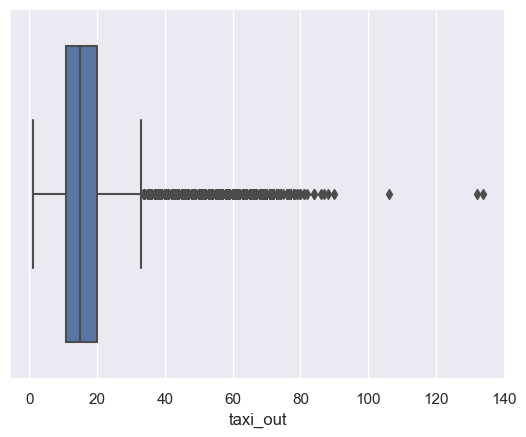

In [206]:
ax = sns.boxplot(x=df_clean["taxi_out"])
plt.show()

In [207]:
Q1 = df["taxi_out"].quantile(0.25)
Q3 = df["taxi_out"].quantile(0.75)
IQR = Q3 - Q1

bound = Q3 + 1.5 * IQR
print(f'The upper bound time limit for taxi time is : {bound}')

The upper bound time limit for taxi time is : 33.5


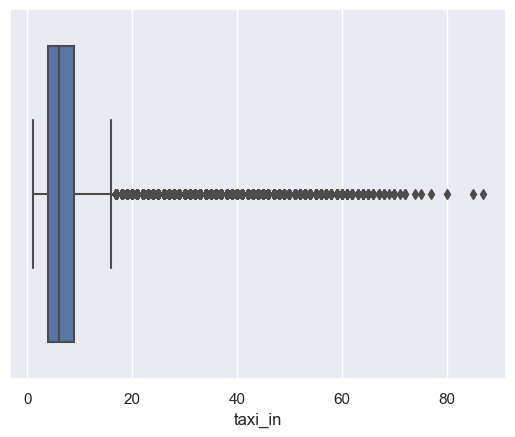

In [208]:
ax = sns.boxplot(x=df_clean["taxi_in"])
plt.show()

In [209]:
Q1 = df["taxi_in"].quantile(0.25)
Q3 = df["taxi_in"].quantile(0.75)
IQR = Q3 - Q1

bound = Q3 + 1.5 * IQR
print(f'The upper bound time limit for taxi time is : {bound}')

The upper bound time limit for taxi time is : 16.5



# Months

In [210]:
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-04-08,AA,AA,AA,2729,AA,N952NN,2729,11057,CLT,...,1,930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-08,AA,AA,AA,2730,AA,N908AA,2730,12889,LAS,...,1,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-08,AA,AA,AA,2731,AA,N900UW,2731,11292,DEN,...,1,641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-08,AA,AA,AA,2733,AA,N992AU,2733,12953,LGA,...,1,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-08,AA,AA,AA,2734,AA,N864NN,2734,11057,CLT,...,1,930,0.0,0.0,17.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2018-07-01,UA,UA,UA,1900,UA,N845UA,1900,10397,ATL,...,1,2139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499996,2018-07-01,UA,UA,UA,1900,UA,N446UA,1900,14679,SAN,...,1,1723,0.0,0.0,102.0,0.0,0.0,NaN,NaN,NaN
499997,2018-07-01,UA,UA,UA,1900,UA,N36447,1900,14771,SFO,...,1,447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499998,2018-07-01,UA,UA,UA,1899,UA,N13720,1899,11057,CLT,...,1,912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


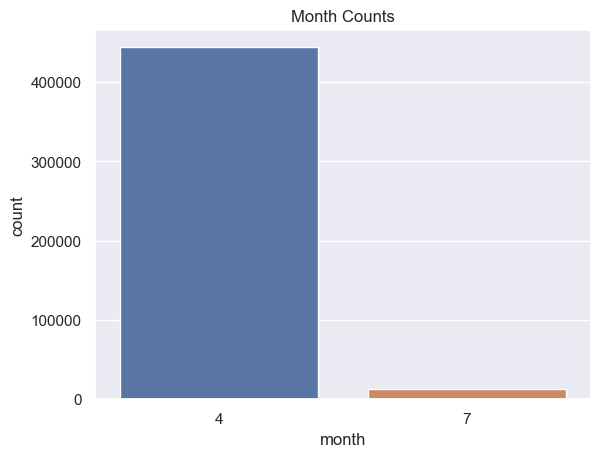

In [211]:
sns.set_style('darkgrid')
ax = sns.countplot(x="month", data=df_clean)
ax.set_title('Month Counts');

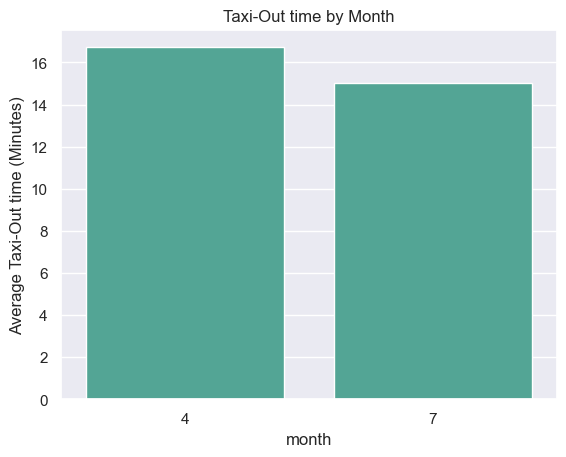

In [213]:
month_grouped = df_clean.groupby(['month'])['taxi_out'].mean()

month_grouped = month_grouped.reset_index()

ax = sns.barplot(x='month', y='taxi_out', data=month_grouped, color='#45B39D');

ax.set_title('Taxi-Out time by Month');
ax.set_ylabel('Average Taxi-Out time (Minutes)');

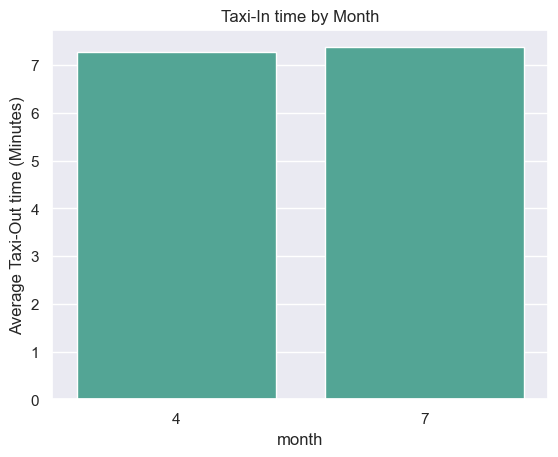

In [214]:
month_grouped = df_clean.groupby(['month'])['taxi_in'].mean()

month_grouped = month_grouped.reset_index()

ax = sns.barplot(x='month', y='taxi_in', data=month_grouped, color='#45B39D');

ax.set_title('Taxi-In time by Month');
ax.set_ylabel('Average Taxi-Out time (Minutes)');

### Let's check Departure Time vs Taxi Out and Arrival Time vs Taxi In

In [215]:
df_clean.columns


Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'date', 'year', 'month', 'origin_region_code',
       'dest_region_code'],
      dtype='object')

In [216]:
# Let's access the dep_time and arr_time columns

In [217]:
df_clean.loc[0:5,["dep_time","arr_time"]]

,dep_time,arr_time
0,2219.0,2357.0
1,1442.0,1556.0
2,619.0,915.0
3,1024.0,1324.0
4,923.0,1123.0
5,1206.0,1516.0


In [218]:
# The data has some NaN values, so let's clean them up and create a new df_clean_departure_time

In [219]:
df_clean_departure_time = df_clean[df_clean.dep_time.notnull()]
df_clean_departure_time

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,date,year,month,origin_region_code,dest_region_code
0,2018-04-08,AA,AA,AA,2729,AA,N952NN,2729,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,NC,MN
1,2018-04-08,AA,AA,AA,2730,AA,N908AA,2730,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,NV,CA
2,2018-04-08,AA,AA,AA,2731,AA,N900UW,2731,11292,DEN,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,CO,TX
3,2018-04-08,AA,AA,AA,2733,AA,N992AU,2733,12953,LGA,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,NY,TX
4,2018-04-08,AA,AA,AA,2734,AA,N864NN,2734,11057,CLT,...,0.0,0.0,NaN,NaN,NaN,2018-04-08,2018,4,NC,MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,2018-07-01,UA,UA,UA,1906,UA,N447UA,1906,11618,EWR,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,NJ,IN
499995,2018-07-01,UA,UA,UA,1900,UA,N845UA,1900,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,GA,CA
499997,2018-07-01,UA,UA,UA,1900,UA,N36447,1900,14771,SFO,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,CA,CA
499998,2018-07-01,UA,UA,UA,1899,UA,N13720,1899,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,NC,TX


In [220]:
df_clean_departure_time["dep_time_hour"] = df_clean_departure_time["dep_time"].apply(lambda x: str(int(x))[:-2])

In [221]:
# Let's create a Boxplot to see the relations between the hour of the day and the taxi_out timing

<AxesSubplot: xlabel='dep_time_hour', ylabel='taxi_out'>

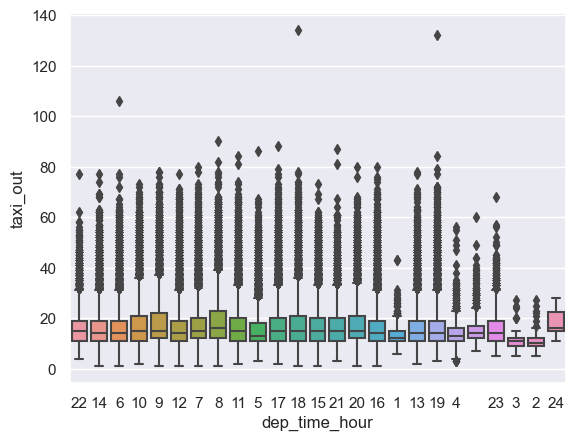

In [222]:
sns.boxplot(data=df_clean_departure_time, x="dep_time_hour", y = "taxi_out")

In [223]:
df_clean_departure_time["dep_time"].apply(lambda x: str(int(x))[:-2])

0         22
1         14
2          6
3         10
4          9
          ..
499994     9
499995     7
499997    11
499998     7
499999     9
Name: dep_time, Length: 452286, dtype: object

In [224]:
# The data has some NaN values, so let's clean them up and create a new df_clean_arrival_time

In [225]:
df_clean_arrival_time = df_clean[df_clean.arr_time.notnull()]
df_clean_arrival_time

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,date,year,month,origin_region_code,dest_region_code
0,2018-04-08,AA,AA,AA,2729,AA,N952NN,2729,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,NC,MN
1,2018-04-08,AA,AA,AA,2730,AA,N908AA,2730,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,NV,CA
2,2018-04-08,AA,AA,AA,2731,AA,N900UW,2731,11292,DEN,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,CO,TX
3,2018-04-08,AA,AA,AA,2733,AA,N992AU,2733,12953,LGA,...,NaN,NaN,NaN,NaN,NaN,2018-04-08,2018,4,NY,TX
4,2018-04-08,AA,AA,AA,2734,AA,N864NN,2734,11057,CLT,...,0.0,0.0,NaN,NaN,NaN,2018-04-08,2018,4,NC,MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,2018-07-01,UA,UA,UA,1906,UA,N447UA,1906,11618,EWR,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,NJ,IN
499995,2018-07-01,UA,UA,UA,1900,UA,N845UA,1900,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,GA,CA
499997,2018-07-01,UA,UA,UA,1900,UA,N36447,1900,14771,SFO,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,CA,CA
499998,2018-07-01,UA,UA,UA,1899,UA,N13720,1899,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,2018-07-01,2018,7,NC,TX


In [226]:
# Clean the data

In [227]:
df_clean_arrival_time["arr_time"].apply(lambda x: str(int(x))[:-2])

0         23
1         15
2          9
3         13
4         11
          ..
499994    10
499995     9
499997    12
499998     8
499999    12
Name: arr_time, Length: 451934, dtype: object

In [228]:
df_clean_arrival_time["arr_time_hour"] = df_clean_arrival_time["arr_time"].apply(lambda x: str(int(x))[:-2])

In [229]:
# Let's create a Boxplot to see the relations between the hour of the day and the taxi_in timing

<AxesSubplot: xlabel='arr_time_hour', ylabel='taxi_in'>

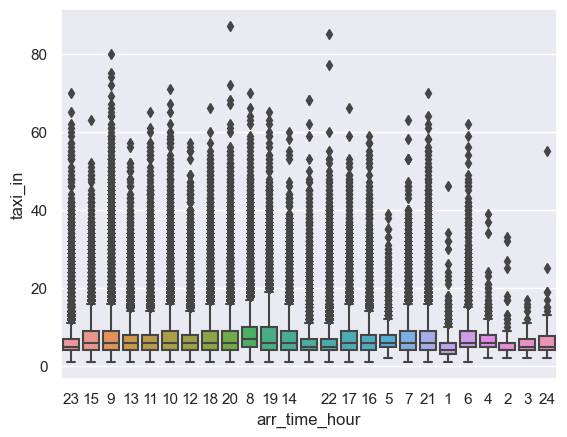

In [230]:
sns.boxplot(data=df_clean_arrival_time, x="arr_time_hour", y = "taxi_in")

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [231]:
flights_usa[['fl_date']] = flights_usa[['fl_date']].apply(pd.to_datetime)
flights_usa['fl_date']

0         2018-01-22
1         2018-01-22
2         2018-01-22
3         2018-01-22
4         2018-01-22
             ...    
1567617   2018-01-22
1567618   2018-01-22
1567619   2018-01-22
1567620   2018-01-22
1567621   2018-01-22
Name: fl_date, Length: 1567622, dtype: datetime64[ns]

In [232]:
flights_usa['year'] = flights_usa['fl_date'].dt.year
flights_usa['month'] = flights_usa['fl_date'].dt.month

In [233]:
#See the distributions
flights_usa[['year', 'month']].value_counts().sort_index(ascending=False)

year  month
2019  12       67473
      11       65095
      10       68491
      9        65006
      8        70726
      7        70191
      6        68116
      5        68471
      4        65462
      3        67862
      2        56530
      1        61876
2018  12       64490
      11       62954
      10       66652
      9        62843
      8        68740
      7        68827
      6        66920
      5        66074
      4        63949
      3        64855
      2        55830
      1        60189
dtype: int64

In [234]:
flights_usa['state'] = flights_usa['origin_city_name'].str[-2:]
flights_usa['late_arr'] = (flights_usa['arr_delay'] > 0).astype(int)
flights_usa['late_dep'] = (flights_usa['dep_delay'] > 0).astype(int)
flights_usa

,fl_date,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,air_time,crs_elapsed_time,actual_elapsed_time,distance,year,month,state,late_arr,late_dep
0,2018-01-22,"Dallas/Fort Worth, TX","Orlando, FL",1845,-5.0,2229.0,1.0,117.0,158,164.0,985,2018,1,TX,1,0
1,2018-01-22,"Dallas/Fort Worth, TX","Baltimore, MD",1313,-2.0,1651.0,-16.0,137.0,172,158.0,1217,2018,1,TX,0,0
2,2018-01-22,"Dallas/Fort Worth, TX","Miami, FL",526,-4.0,900.0,-11.0,135.0,161,154.0,1121,2018,1,TX,0,0
3,2018-01-22,"Kansas City, MO","Chicago, IL",1553,-4.0,1801.0,28.0,98.0,96,128.0,403,2018,1,MO,1,0
4,2018-01-22,"Dallas/Fort Worth, TX","St. Louis, MO",1836,-4.0,2015.0,-10.0,76.0,105,99.0,550,2018,1,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567617,2018-01-22,"Hartford, CT","Philadelphia, PA",1305,-5.0,1415.0,-19.0,52.0,84,70.0,196,2018,1,CT,0,0
1567618,2018-01-22,"Chicago, IL","Orlando, FL",1457,-8.0,1845.0,3.0,139.0,157,168.0,1005,2018,1,IL,1,0
1567619,2018-01-22,"Chicago, IL","Minneapolis, MN",2151,-5.0,2318.0,-2.0,59.0,84,87.0,334,2018,1,IL,0,0
1567620,2018-01-22,"Chicago, IL","Pittsburgh, PA",830,-5.0,1105.0,5.0,61.0,85,95.0,413,2018,1,IL,1,0


In [235]:
flights_usa['speed'] = flights_usa['distance']/flights_usa['air_time']
no_dep_delay = flights_usa[flights_usa['late_dep'] == 0]
yes_dep_delay = flights_usa[flights_usa['late_dep'] == 1]

In [236]:
#If there is no departure delay, there is a 15% chance of late arrival
no_dep_delay['late_arr'].mean()

0.15245505306299495

In [237]:
#If there is a departure delay, there is a 73% chance of late arrival
yes_dep_delay['late_arr'].mean()

0.7306584042797868

#### **Task 6**: How many states cover 50% of US air traffic? 

In [238]:
top_8 = flights_usa['state'].value_counts().head(8)
top_8

CA    171552
TX    154073
FL    113839
IL     98147
GA     83351
NY     81020
NC     72233
CO     61526
Name: state, dtype: int64

In [239]:
total_flight = flights_usa['origin_city_name'].count()
total_flight

1567622

In [240]:
#These 8 states cover 53% of the flight
top_8.sum()/total_flight

0.5331266083277729

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [241]:
#Mean of planes speed without departure delay
no_dep_delay['speed'].mean()

6.595703152193079

In [242]:
#Mean of planes speed with departure delay
yes_dep_delay['speed'].mean()

6.757231148937526

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

Short-haul is a flight lasting anywhere from 30 minutes to 3 hours. Medium-haul is defined by flights lasting between 3-6 hours. And lastly, long-haul flights are those that extend beyond 6 hours.

In [250]:
flights_usa['dep_time_hour'] = flights_usa['dep_time']//100

In [251]:
flights_clean_airtime = flights_usa[flights_usa['air_time'].notna()]
flights_clean_airtime

,fl_date,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,air_time,crs_elapsed_time,actual_elapsed_time,distance,year,month,state,late_arr,late_dep,speed,dep_time_hour
0,2018-01-22,"Dallas/Fort Worth, TX","Orlando, FL",1845,-5.0,2229.0,1.0,117.0,158,164.0,985,2018,1,TX,1,0,8.418803,18
1,2018-01-22,"Dallas/Fort Worth, TX","Baltimore, MD",1313,-2.0,1651.0,-16.0,137.0,172,158.0,1217,2018,1,TX,0,0,8.883212,13
2,2018-01-22,"Dallas/Fort Worth, TX","Miami, FL",526,-4.0,900.0,-11.0,135.0,161,154.0,1121,2018,1,TX,0,0,8.303704,5
3,2018-01-22,"Kansas City, MO","Chicago, IL",1553,-4.0,1801.0,28.0,98.0,96,128.0,403,2018,1,MO,1,0,4.112245,15
4,2018-01-22,"Dallas/Fort Worth, TX","St. Louis, MO",1836,-4.0,2015.0,-10.0,76.0,105,99.0,550,2018,1,TX,0,0,7.236842,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567617,2018-01-22,"Hartford, CT","Philadelphia, PA",1305,-5.0,1415.0,-19.0,52.0,84,70.0,196,2018,1,CT,0,0,3.769231,13
1567618,2018-01-22,"Chicago, IL","Orlando, FL",1457,-8.0,1845.0,3.0,139.0,157,168.0,1005,2018,1,IL,1,0,7.230216,14
1567619,2018-01-22,"Chicago, IL","Minneapolis, MN",2151,-5.0,2318.0,-2.0,59.0,84,87.0,334,2018,1,IL,0,0,5.661017,21
1567620,2018-01-22,"Chicago, IL","Pittsburgh, PA",830,-5.0,1105.0,5.0,61.0,85,95.0,413,2018,1,IL,1,0,6.770492,8


> ##### 8.1: SMALL haul

Flights with air_time of less than 180min:

In [303]:
flights_small = flights_clean_airtime[flights_clean_airtime['air_time']<180]
flights_small

,fl_date,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,air_time,crs_elapsed_time,actual_elapsed_time,distance,year,month,state,late_arr,late_dep,speed,dep_time_hour
0,2018-01-22,"Dallas/Fort Worth, TX","Orlando, FL",1845,-5.0,2229.0,1.0,117.0,158,164.0,985,2018,1,TX,1,0,8.418803,18
1,2018-01-22,"Dallas/Fort Worth, TX","Baltimore, MD",1313,-2.0,1651.0,-16.0,137.0,172,158.0,1217,2018,1,TX,0,0,8.883212,13
2,2018-01-22,"Dallas/Fort Worth, TX","Miami, FL",526,-4.0,900.0,-11.0,135.0,161,154.0,1121,2018,1,TX,0,0,8.303704,5
3,2018-01-22,"Kansas City, MO","Chicago, IL",1553,-4.0,1801.0,28.0,98.0,96,128.0,403,2018,1,MO,1,0,4.112245,15
4,2018-01-22,"Dallas/Fort Worth, TX","St. Louis, MO",1836,-4.0,2015.0,-10.0,76.0,105,99.0,550,2018,1,TX,0,0,7.236842,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567617,2018-01-22,"Hartford, CT","Philadelphia, PA",1305,-5.0,1415.0,-19.0,52.0,84,70.0,196,2018,1,CT,0,0,3.769231,13
1567618,2018-01-22,"Chicago, IL","Orlando, FL",1457,-8.0,1845.0,3.0,139.0,157,168.0,1005,2018,1,IL,1,0,7.230216,14
1567619,2018-01-22,"Chicago, IL","Minneapolis, MN",2151,-5.0,2318.0,-2.0,59.0,84,87.0,334,2018,1,IL,0,0,5.661017,21
1567620,2018-01-22,"Chicago, IL","Pittsburgh, PA",830,-5.0,1105.0,5.0,61.0,85,95.0,413,2018,1,IL,1,0,6.770492,8


In [306]:
flights_small['dep_time_hour'].value_counts().head(10)

6     85015
17    84648
12    84036
11    83619
15    82718
8     82219
10    80485
14    79821
7     78941
9     78575
Name: dep_time_hour, dtype: int64

>##### 8.2: MEDIUM haul:

Flights with air_time greater than or equal to 180min and less than 360min:

In [304]:
flights_medium = flights_clean_airtime[flights_clean_airtime['air_time']>=180]
flights_medium = flights_medium[flights_medium['air_time']<360]
flights_medium

,fl_date,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,air_time,crs_elapsed_time,actual_elapsed_time,distance,year,month,state,late_arr,late_dep,speed,dep_time_hour
7,2018-01-22,"Philadelphia, PA","Phoenix, AZ",838,-2.0,1214.0,-7.0,290.0,341,336.0,2075,2018,1,PA,0,0,7.155172,8
8,2018-01-22,"Los Angeles, CA","Charlotte, NC",2256,1.0,608.0,-30.0,226.0,283,252.0,2125,2018,1,CA,0,1,9.402655,22
10,2018-01-22,"Philadelphia, PA","Los Angeles, CA",803,-2.0,1048.0,-50.0,319.0,393,345.0,2402,2018,1,PA,0,0,7.529781,8
12,2018-01-22,"Philadelphia, PA","San Diego, CA",1824,14.0,2113.0,-2.0,311.0,365,349.0,2370,2018,1,PA,0,1,7.620579,18
15,2018-01-22,"New York, NY","San Francisco, CA",1723,-2.0,2030.0,-50.0,345.0,415,367.0,2586,2018,1,NY,0,0,7.495652,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567484,2018-01-22,"Seattle, WA","Chicago, IL",621,6.0,1223.0,8.0,218.0,240,242.0,1733,2018,1,WA,1,1,7.949541,6
1567533,2018-01-22,"Tampa, FL","Denver, CO",1226,-4.0,1414.0,-16.0,211.0,240,228.0,1506,2018,1,FL,0,0,7.137441,12
1567536,2018-01-22,"Tampa, FL","Las Vegas, NV",1612,7.0,1821.0,11.0,294.0,305,309.0,1984,2018,1,FL,1,1,6.748299,16
1567563,2018-01-22,"Washington, DC","Houston, TX",1757,-8.0,2027.0,-18.0,188.0,220,210.0,1208,2018,1,DC,0,0,6.425532,17


In [305]:
flights_medium['dep_time_hour'].value_counts().head(10)

8     15352
7     15337
6     13973
17    12278
9     12185
10    11643
12    11628
11    11521
16    10514
15    10511
Name: dep_time_hour, dtype: int64

> ##### 8.3: LONG haul

Flights with air_time greater than 360min or 6 hours:

In [307]:
flights_long = flights_clean_airtime[flights_clean_airtime['air_time']>=360]
flights_long

,fl_date,origin_city_name,dest_city_name,dep_time,dep_delay,arr_time,arr_delay,air_time,crs_elapsed_time,actual_elapsed_time,distance,year,month,state,late_arr,late_dep,speed,dep_time_hour
13,2018-01-22,"Miami, FL","Seattle, WA",1955,0.0,2339.0,-19.0,370.0,423,404.0,2724,2018,1,FL,0,0,7.362162,19
176,2018-01-22,"Lihue, HI","Denver, CO",2039,-11.0,608.0,-30.0,370.0,408,389.0,3414,2018,1,HI,0,0,9.227027,20
196,2018-01-22,"Denver, CO","Lihue, HI",1329,109.0,1814.0,97.0,443.0,477,465.0,3414,2018,1,CO,1,1,7.706546,13
380,2018-01-22,"Honolulu, HI","Dallas/Fort Worth, TX",1846,1.0,538.0,-20.0,385.0,433,412.0,3784,2018,1,HI,0,1,9.828571,18
393,2018-01-22,"Miami, FL","San Francisco, CA",2120,-5.0,41.0,-19.0,365.0,395,381.0,2585,2018,1,FL,0,0,7.082192,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566582,2018-01-22,"Boston, MA","San Francisco, CA",1830,-10.0,2156.0,-42.0,360.0,418,386.0,2704,2018,1,MA,0,0,7.511111,18
1566976,2018-01-22,"Miami, FL","San Francisco, CA",1823,8.0,2149.0,3.0,362.0,391,386.0,2585,2018,1,FL,1,1,7.140884,18
1567026,2018-01-22,"Honolulu, HI","Chicago, IL",1637,-13.0,437.0,-16.0,445.0,483,480.0,4243,2018,1,HI,0,0,9.534831,16
1567029,2018-01-22,"Chicago, IL","Kahului, HI",939,-6.0,1453.0,-19.0,520.0,567,554.0,4184,2018,1,IL,0,0,8.046154,9


In [308]:
flights_long['dep_time_hour'].value_counts().head(10)

11    633
17    537
9     534
10    482
15    481
18    407
16    406
7     398
19    390
8     337
Name: dep_time_hour, dtype: int64

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [316]:
flights_usa = df_fl_init.copy()

In [317]:
flights_usa['origin_airport_id'].value_counts().head(15)

10397    25605
13930    23946
11298    17605
11292    16200
12892    16047
11057    15696
14747    11724
14107    11591
14771    11388
11433    11347
12953    11045
12266    10907
12889    10590
13487    10459
11618    10404
Name: origin_airport_id, dtype: int64

In [320]:
df_pa_init    = passengers_initial_300000_records.copy()
df_pa_init

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,month,year,distance_group,class
0,3,3,3600,18,0,210,41,81,166,160,...,"Olga Bay, AK",US,United States,0,40,4,10,2019,1,F
1,3,3,3000,15,3,24,0,39,67,61,...,"Old Harbor, AK",US,United States,0,79,3,10,2019,1,F
2,3,3,3600,18,1,0,0,93,167,161,...,"Kodiak Island, AK",US,United States,0,40,4,10,2019,1,F
3,3,3,3600,18,4,175,86,14,38,32,...,"Seal Bay, AK",US,United States,0,40,4,10,2019,1,F
4,3,3,3600,18,0,209,41,10,32,26,...,"Lazy Bay, AK",US,United States,0,40,4,10,2019,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,22,29700,132,60,929,6161,67,929,776,...,"Kongiganak, AK",US,United States,0,35,3,6,2018,1,F
299996,0,21,71400,189,119,1325,8953,67,635,537,...,"Kongiganak, AK",US,United States,4,416,3,6,2018,1,F
299997,0,1,3400,9,0,0,0,67,32,28,...,"Kongiganak, AK",US,United States,4,416,3,6,2018,1,L
299998,0,32,43200,192,94,615,2556,15,468,300,...,"Akiachak, AK",US,United States,0,35,3,6,2018,1,F


In [321]:
top_10_busiest = df_pa_init[['passengers', 'origin_airport_id']].groupby(['origin_airport_id']).sum().sort_values(by='passengers', ascending = False).head(10)
top_10_busiest

,passengers
origin_airport_id,
10397,52600069
13930,37614331
12892,35368279
11298,34922835
11292,32818645
11057,23912817
14771,23665636
12889,23206372
14747,23186288


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

##### 10.1 Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

In [243]:
Monthly_Avg_Delay= df_clean.groupby(['mkt_carrier','month'], axis=0, as_index=True).agg({'arr_delay':'mean'})
Monthly_Avg_Delay.head(15)

arr_delay
mkt_carrier month           
AA          4      -6.666034
            7      -5.156539
AS          4      -5.491891
            7      -4.827586
B6          4      -4.914910
            7      -9.107612
DL          4      -7.670184
            7      -9.928621
F9          4      -6.885154
G4          4      -5.090748
HA          4      -2.476058
            7      -6.000000
NK          4      -7.159871
            7      -4.835526
UA          4      -8.058048

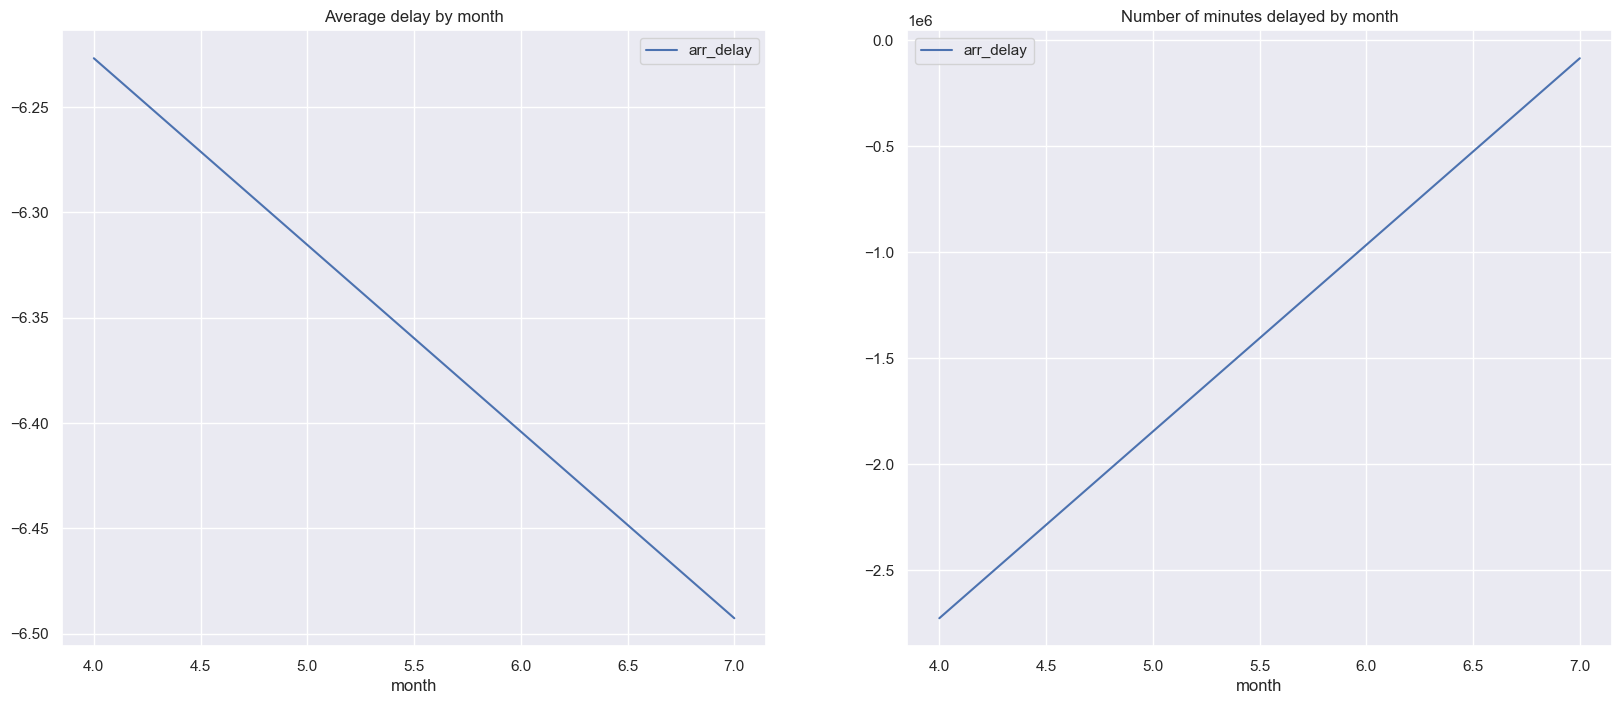

In [244]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df_clean[['month','arr_delay']].groupby(['month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
df_clean[['month','arr_delay']].groupby(['month']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

##### 10.2 Find out distance covered monthly by different air carriers

In [245]:
Monthly_Distance= df_clean.groupby(['mkt_carrier','month'], axis=0, as_index=True).agg({'distance':'sum'})
Monthly_Distance.head(15)

distance
mkt_carrier month          
AA          4      79097900
            7       2312109
AS          4      24927891
            7        201893
B6          4      17509275
            7        466734
DL          4      69465758
            7       2032431
F9          4       6620297
G4          4       4557719
HA          4       3039131
            7         12385
NK          4      10177778
            7        476624
UA          4      66282851

<AxesSubplot: xlabel='mkt_carrier', ylabel='distance'>

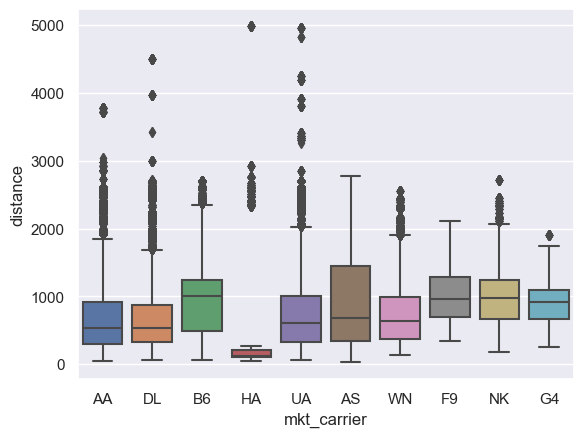

In [246]:
sns.boxplot(data=df_clean, x="mkt_carrier", y = "distance")

##### 10.3 Find out number of passengers that were carried by different air carriers

In [247]:
Monthly_Passengers= df_pa_init.groupby(['carrier_name','month'], axis=0, as_index=True).agg({'passengers':'sum'})
Monthly_Passengers.head(15)

passengers
carrier_name                month            
40-Mile Air                 1              35
                            2              29
                            3              60
                            4              71
                            11             37
                            12            110
ABS JETS A.S                8              10
                            11              2
                            12              2
ABSA-Aerolinhas Brasileiras 4               0
                            5               0
                            11              0
                            12              0
ABX Air Inc                 1               0
                            2               0

##### 10.4 Find out total fuel comsumption per air carrier.

In [248]:
Fuel_Cons= df_fc.groupby(['carrier_name'], axis=0, as_index=True).agg({'total_gallons':'sum'})
Fuel_Cons.head(15)

,total_gallons
carrier_name,
ABX Air Inc,6.367883e+06
Air Transport International,4.061171e+07
Air Wisconsin Airlines Corp,1.306834e+08
Alaska Airlines Inc.,2.678455e+09
Allegiant Air,8.497621e+08
Aloha Air Cargo,2.405682e+07
American Airlines Inc.,1.663489e+10
Amerijet International,1.109990e+08
Asia Pacific,1.841684e+07


<AxesSubplot: xlabel='carrier_name', ylabel='total_gallons'>

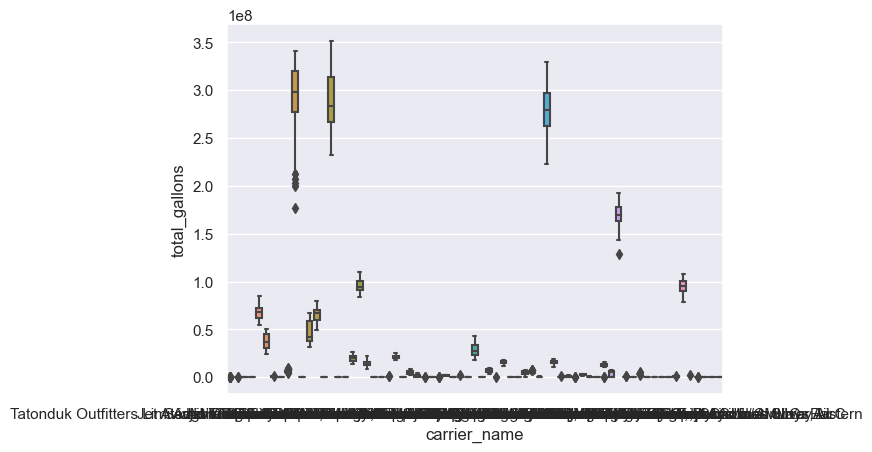

In [249]:
sns.boxplot(data=df_fc, x="carrier_name", y = "total_gallons")